In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [30]:
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('tmdb_5000_movies.csv')
data2 = pd.read_csv('tmdb_5000_credits.csv')
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [32]:
data['profit'] = (data.revenue - data.budget)

In [33]:
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087


In [34]:
data2.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [35]:
columns = data.columns.to_list()
good_list = columns[8:9] + columns[11:12] + columns[13:14] + columns[-4:-2] + columns[-1:]
new_data = data[good_list]

In [36]:
new_data.head(3)

,popularity,release_date,runtime,title,vote_average,profit
0,150.437577,2009-12-10,162.0,Avatar,7.2,2550965087
1,139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,661000000
2,107.376788,2015-10-26,148.0,Spectre,6.3,635674609


In [37]:
new_data.dtypes

popularity      float64
release_date     object
runtime         float64
title            object
vote_average    float64
profit            int64
dtype: object

In [38]:
new_data.index = new_data.title
new_data.drop('title', axis=1, inplace=True)

In [39]:
new_data.head(3)

,popularity,release_date,runtime,vote_average,profit
title,,,,,
Avatar,150.437577,2009-12-10,162.0,7.2,2550965087
Pirates of the Caribbean: At World's End,139.082615,2007-05-19,169.0,6.9,661000000
Spectre,107.376788,2015-10-26,148.0,6.3,635674609


In [40]:
split = new_data.release_date.str.split('-')
new_data.release_date = split.str.get(0)

In [41]:
new_data.release_date.value_counts()

release_date
2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
1935      1
1932      1
1916      1
1934      1
1925      1
Name: count, Length: 90, dtype: int64

In [42]:
new_data.release_date.unique()

array(['2009', '2007', '2015', '2012', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1944', '1938', '1949', '1936',
       '2017', '1941', '1955', '1942', '1929', '1935', nan, '1933',
       '1916', '1934', '1925'], dtype=object)

In [43]:
new_data.isna().sum()

popularity      0
release_date    1
runtime         2
vote_average    0
profit          0
dtype: int64

In [44]:
new_data.dropna(subset=['release_date', 'runtime'], inplace=True)

In [45]:
new_data.isna().sum()

popularity      0
release_date    0
runtime         0
vote_average    0
profit          0
dtype: int64

In [46]:
new_data.release_date = new_data.release_date.astype('int64')

In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, Avatar to My Date with Drew
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    4800 non-null   float64
 1   release_date  4800 non-null   int64  
 2   runtime       4800 non-null   float64
 3   vote_average  4800 non-null   float64
 4   profit        4800 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 225.0+ KB


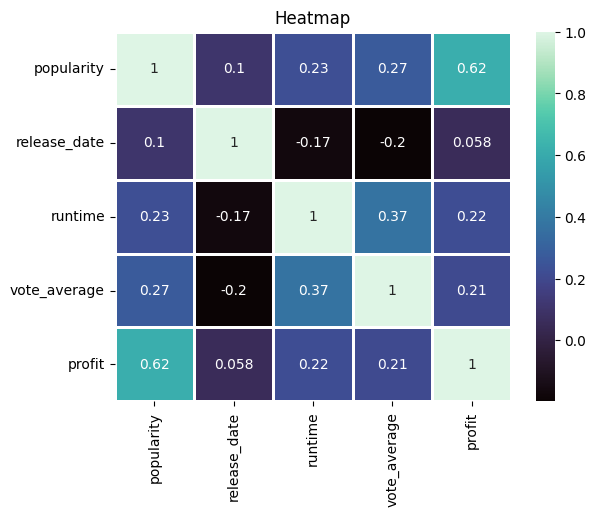

<Figure size 640x480 with 0 Axes>

In [48]:
sns.heatmap(new_data.corr(), annot=True, cmap='mako', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf()

In [49]:
new_data.dropna(inplace=True)

In [50]:
X = new_data[['popularity', 'release_date', 'runtime', 'profit']]
y = new_data['vote_average']

In [51]:
X.tail()

,popularity,release_date,runtime,profit
title,,,,
El Mariachi,14.269792,1992,81.0,1820920
Newlyweds,0.642552,2011,85.0,-9000
"Signed, Sealed, Delivered",1.444476,2013,120.0,0
Shanghai Calling,0.857008,2012,98.0,0
My Date with Drew,1.929883,2005,90.0,0


In [52]:
y.tail()

title
El Mariachi                  6.6
Newlyweds                    5.9
Signed, Sealed, Delivered    7.0
Shanghai Calling             5.7
My Date with Drew            6.3
Name: vote_average, dtype: float64

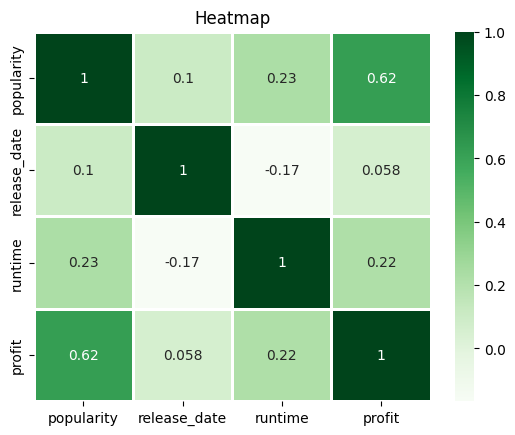

<Figure size 640x480 with 0 Axes>

In [53]:
sns.heatmap(X.corr(), annot=True, cmap='Greens', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf() 

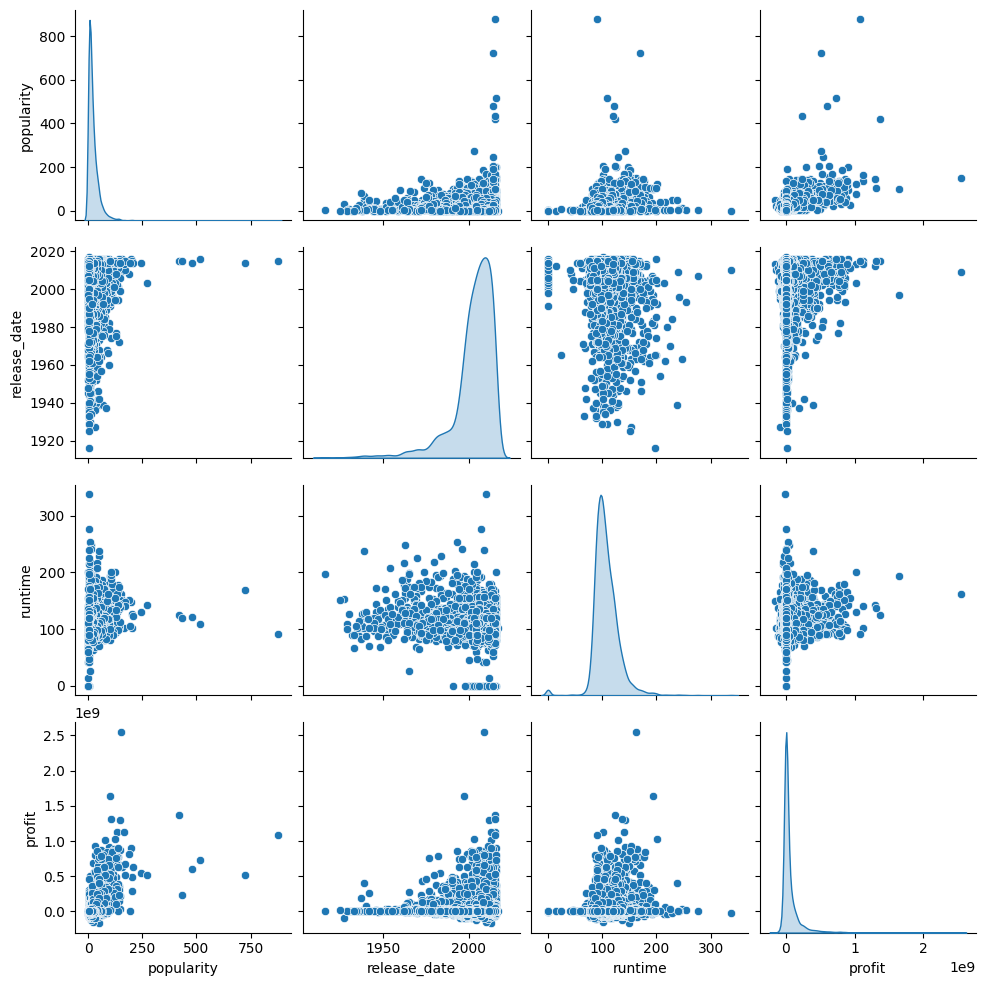

<Figure size 640x480 with 0 Axes>

In [54]:
sns.pairplot(X, diag_kind='kde')
plt.show()
plt.clf()

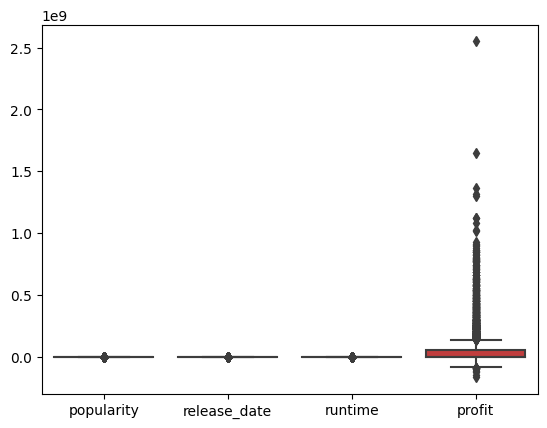

<Figure size 640x480 with 0 Axes>

In [55]:
sns.boxplot(X)
plt.show()
plt.clf()

In [56]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [57]:
predictors = X

In [58]:
predictors, y

(array([[1.71814163e-01, 9.20792079e-01, 4.79289941e-01, 1.00000000e+00],
        [1.58845673e-01, 9.00990099e-01, 5.00000000e-01, 3.04309509e-01],
        [1.22634484e-01, 9.80198020e-01, 4.37869822e-01, 2.94987309e-01],
        ...,
        [1.64930956e-03, 9.60396040e-01, 3.55029586e-01, 6.09973881e-02],
        [9.78363013e-04, 9.50495050e-01, 2.89940828e-01, 6.09973881e-02],
        [2.20369235e-03, 8.81188119e-01, 2.66272189e-01, 6.09973881e-02]]),
 title
 Avatar                                      7.2
 Pirates of the Caribbean: At World's End    6.9
 Spectre                                     6.3
 The Dark Knight Rises                       7.6
 John Carter                                 6.1
                                            ... 
 El Mariachi                                 6.6
 Newlyweds                                   5.9
 Signed, Sealed, Delivered                   7.0
 Shanghai Calling                            5.7
 My Date with Drew                          

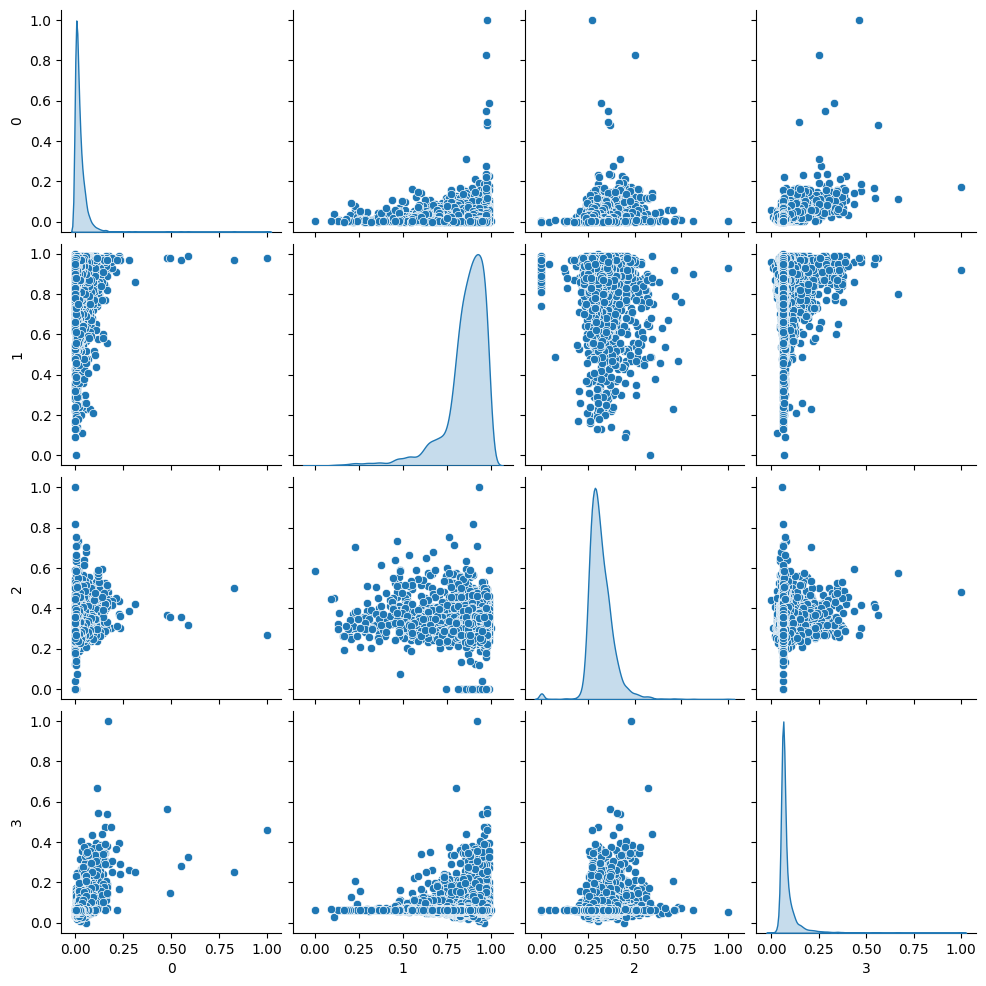

<Figure size 640x480 with 0 Axes>

In [59]:
sns.pairplot(pd.DataFrame(predictors), diag_kind='kde')
plt.show()
plt.clf()

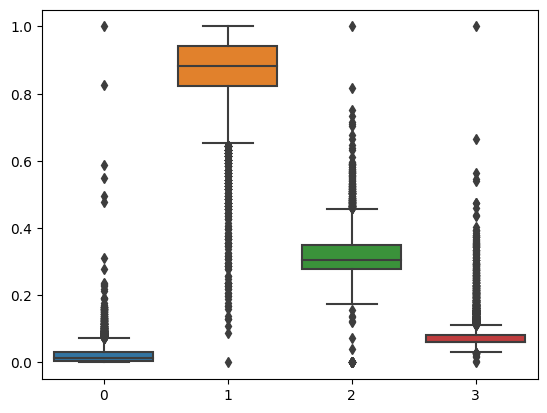

<Figure size 640x480 with 0 Axes>

In [60]:
sns.boxplot(pd.DataFrame(predictors))
plt.show()
plt.clf()

In [61]:
y = np.array(y)
pred_rate = y

In [62]:
X_train, X_test, y_train, y_test = train_test_split(predictors, pred_rate, test_size=0.05, random_state=75)

In [63]:
regressor = KNeighborsRegressor(n_neighbors=15, weights='uniform')
model = regressor.fit(X_train, y_train)

In [64]:
model.predict([[-0.63047829,  0.84882375,  0.58077638, -0.39159292],
        [-0.64894119,  0.76826311, -0.39443368, -0.39159292],
        [-0.61522296,  0.20433869, -0.74905552, -0.39159292]])

array([5.93333333, 2.92      , 4.55333333])

In [65]:
y_pred = model.predict(X_test)

In [66]:
scores_and_k = []
accuracies = []
for k in range(1, 100):
  regressor = KNeighborsRegressor(n_neighbors = k)
  regressor.fit(X_train, y_train)
  a = regressor.score(X_test, y_test)
  print(f'Accuracy: {a}')
  scores_and_k.append([a, k])
  accuracies.append(a)
print(f'Max Accuracy: {max(scores_and_k)[0]}, number of neighbors: {max(scores_and_k)[1]}')


Accuracy: -0.35928224030770095
Accuracy: 0.10965066612781849
Accuracy: 0.22585286657933623
Accuracy: 0.2612605040552971
Accuracy: 0.2586781264806711
Accuracy: 0.2692909675576243
Accuracy: 0.28205811227191624
Accuracy: 0.29534601651558023
Accuracy: 0.29391470611613324
Accuracy: 0.29442980225201376
Accuracy: 0.296068494911386
Accuracy: 0.2927713997626282
Accuracy: 0.3083177456576187
Accuracy: 0.31840156768412653
Accuracy: 0.3126131116623466
Accuracy: 0.31401094460939905
Accuracy: 0.3094969228561474
Accuracy: 0.3049979651255815
Accuracy: 0.30498109547023966
Accuracy: 0.29056453200340027
Accuracy: 0.2881703985978572
Accuracy: 0.2869058974390277
Accuracy: 0.28077949299343696
Accuracy: 0.2871904399306232
Accuracy: 0.2901387441121548
Accuracy: 0.28387140379869813
Accuracy: 0.28561516979165347
Accuracy: 0.2860375937248837
Accuracy: 0.2805828197523058
Accuracy: 0.2857775149344556
Accuracy: 0.28422610368431356
Accuracy: 0.28100819844074454
Accuracy: 0.2806916135016708
Accuracy: 0.290304020754205

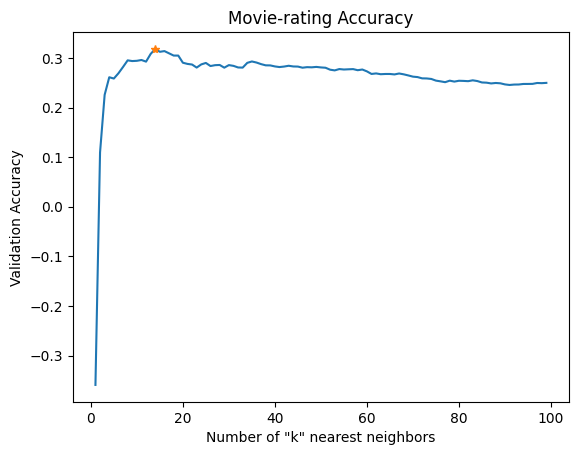

<Figure size 640x480 with 0 Axes>

In [67]:
k_list = list(range(1, 100))
sns.lineplot(x=k_list, y=accuracies)
plt.xlabel('Number of "k" nearest neighbors')
plt.ylabel('Validation Accuracy')
plt.title('Movie-rating Accuracy')
plt.plot(max(scores_and_k)[1], max(scores_and_k)[0], '-*')
plt.show()
plt.clf()